In [1]:
import random
import gym
import numpy as np
from collections import deque

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
class DQNAgent:
    def __init__(self, state_size, action_size, gamma=0.95, epsilon=1.0,
                 epsilon_min=0.01, epsilon_decay=0.995, learning_rate=0.001):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = gamma  # discount rate
        self.epsilon = epsilon  # exploration rate
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.learning_rate = learning_rate
        self.model = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse',
                      optimizer=Adam(lr=self.learning_rate))
        return model

    def act(self, state):
        state = np.reshape(state, [1, state_size])
        result = self.model.predict(state)
        return 0 if result < 0 else 1

In [4]:
def play_n_games(n_games=100):
    memory = []
    actions = []
    results = np.array([])
    for e in range(n_games):
        state = env.reset()
        local_memory = np.array([0,0,0,0])
        local_actions = np.array([])
        for time in range(500):
            #env.render()
            local_memory = np.vstack((local_memory, state))
            action = agent.act(state)
            local_actions = np.append(local_actions, action)
            state, _, done, _ = env.step(action)
            if done or time == 498:
                memory.append(local_memory[1:])
                actions.append(local_actions)
                results = np.append(results, time)
                break
    return memory, actions, results

In [5]:
def games_to_train_data(memory, actions, results, benchmark):
    train_batch = np.array([0,0,0,0])
    train_labels = []
    for local_memory, local_actions, result in zip(memory, actions, results):
        train_batch = np.vstack((train_batch, np.array(local_memory)))
        if result > benchmark:
            local_labels = [-1 if x<=0 else 1 for x in local_actions]
        else:
            local_labels = [1 if x<=0 else -1 for x in local_actions]
        train_labels = np.append(train_labels, local_labels)
    return train_batch[1:], train_labels

In [6]:
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)

[2017-09-17 23:35:26,813] Making new env: CartPole-v1


In [7]:
record = []
i = 0
benchmark = 0

In [8]:
%%time
while i <= 200:
    i += 1
    memory, actions, results = play_n_games(n_games=50)
    record.append((results.mean(), results.var()))
    print('Current resulst: {}, variance: {}. This is try number{}'.format(results.mean(), results.var(), i))              
    benchmark = results.mean()
    train_batch, train_labels = games_to_train_data(memory, actions, results, benchmark)
    if benchmark != 498:
        agent.model.fit(train_batch, train_labels, epochs=1, verbose=0)

Current resulst: 8.38, variance: 0.5156000000000001. This is try number1
Current resulst: 28.26, variance: 306.5524. This is try number2
Current resulst: 102.24, variance: 4303.9424. This is try number3
Current resulst: 78.18, variance: 2056.5076000000004. This is try number4
Current resulst: 94.9, variance: 5784.050000000001. This is try number5
Current resulst: 116.86, variance: 1915.1203999999998. This is try number6
Current resulst: 112.78, variance: 1519.6515999999997. This is try number7
Current resulst: 118.88, variance: 3895.9856. This is try number8
Current resulst: 177.72, variance: 1339.0016. This is try number9
Current resulst: 145.3, variance: 16364.369999999997. This is try number10
Current resulst: 166.18, variance: 7305.067600000001. This is try number11
Current resulst: 184.82, variance: 2713.7476. This is try number12
Current resulst: 46.96, variance: 1077.5184. This is try number13
Current resulst: 66.0, variance: 2806.16. This is try number14
Current resulst: 153.56

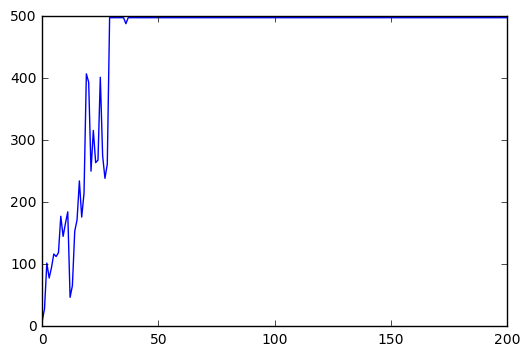

In [9]:
plt.plot([x[0] for x in record])
plt.show()